THis is a QFC data convert, load all jpg recursively under the folder
convert all into x_train, y_train, x_test, y_test
where 
x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32).
y_train, y_test: uint8 array of category labels (integers in range 0,1,2,3) with shape (num_samples,).

RAW FILES:
files name 

LF: Left Front 0

LR: Left Rear 1

RF: Right Front 2

RR: Right Rear 3

find all figures recursively, crop the middle square, downsize to 224*224, save all into train files

In [1]:
DATA_PATH = 'data/'
test_ratio = 0.1

In [2]:
import fnmatch
import os
import numpy
from keras.preprocessing import image

matches = []
target = []

for root, dirs, files in os.walk(DATA_PATH):
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            matches.append(os.path.join(root, filename))
            if "LF." in filename:
                target.append(0)
            if "LR." in filename:
                target.append(1)
            if "RF." in filename:
                target.append(2)
            if "RR." in filename:
                target.append(3)                
            

Using Theano backend.


In [3]:
def cropcenter(img):
    width, height = img.size
    if width <= height:
        length = width
    else:
        length = height

    left = (width - length)/2
    top = (height - length)/2
    right = (width + length)/2
    bottom = (height + length)/2

    img = img.crop((left,top,right,bottom))
    img = img.resize((224,224))
    return img

In [4]:
print(matches)
print(target)

['data/2016-Ford-Mustang-GT-burnout-red-tire-smoke_LF.jpg', 'data/2017-ford-gt-supercar-25-cars-worth-waiting-for-feature-car-and-driver-photo-657590-s-original_LF.jpg', 'data/car-49278_960_720_RF.jpg', 'data/car_tips_LR.jpg', 'data/smart-ed-black-rear_LR.jpg', 'data/super-cars_RF.png', 'data/tata-tamo-racemo-sports-car_RR.jpg', 'data/1/ford_gt_2016-wallpaper-5120x2880_RF.jpg', 'data/1/images1_LR.jpeg', 'data/1/images_LF.jpeg', 'data/1/images_LR.jpeg', 'data/1/maxresdefault_LR.jpg']
[0, 0, 2, 1, 1, 2, 3, 2, 1, 0, 1, 1]


In [5]:
all_files_count = len(target)
test_files_count = int(all_files_count*test_ratio)
train_files_count = all_files_count - test_files_count

In [6]:
istest = numpy.zeros(all_files_count)
istest[:test_files_count] = 1
numpy.random.shuffle(istest)
istest

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

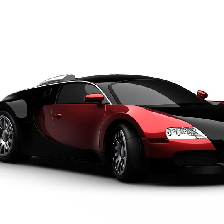

In [7]:
img_path = matches[2]
#img = image.load_img(img_path, target_size=(224, 224))
img = image.load_img(img_path)
img = cropcenter(img)
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
img

In [8]:
x_train = []
x_test = []
y_train = []
y_test = []

In [9]:
for i in matches:
    index = matches.index(i)
    img_path = matches[index]
    img = image.load_img(img_path)
    arr = image.img_to_array(cropcenter(img))
    if istest[index]:
        x_test.append(arr)
        y_test.append(target[index])
    else:
        x_train.append(arr)
        y_train.append(target[index])        
x_test=numpy.array(x_test)
x_train=numpy.array(x_train)
y_test=numpy.array(y_test)
y_train=numpy.array(y_train)

/Users/myt007/anaconda/lib/python2.7/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [10]:
numpy.save("qfc_x_train.npy", x_train)
numpy.save("qfc_x_test.npy", x_test)
numpy.save("qfc_y_train.npy", y_train)
numpy.save("qfc_y_test.npy", y_test)